## Visualization GPU Load

### Plot Value from log (wandb)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df_power = pd.read_csv("../log/Power_log.csv")

# df_ultiz = pd.read_csv("log/utilzation_wandb_export_2024-09-06T16_56_59.680+07_00.csv")
# time = df_power['Relative Time (Process)'] / 60
# power = df_power['hopeful-cosmos-2 - system/gpu.0.powerWatts']
# ultiz = df_ultiz['hopeful-cosmos-2 - system/gpu.0.gpu']

# fig, ax = plt.subplots(2)

# ax[0].plot(time, power, label='GPU 0')
# ax[0].set_title('GPU Power Consumption')
# ax[1].plot(time, ultiz, label='GPU 0')
# ax[1].set_title('GPU Utilization')
# plt.show()

In [10]:
df_power.columns

Index(['Relative Time (Process)',
       'Nvdia A100 x2 - system/gpu.process.0.powerWatts',
       'Nvdia A100 x2 - system/gpu.process.0.powerWatts__MIN',
       'Nvdia A100 x2 - system/gpu.process.0.powerWatts__MAX',
       'Nvdia A100x1 - system/gpu.process.0.powerWatts',
       'Nvdia A100x1 - system/gpu.process.0.powerWatts__MIN',
       'Nvdia A100x1 - system/gpu.process.0.powerWatts__MAX',
       'Nvidia H100 x1 - system/gpu.process.0.powerWatts',
       'Nvidia H100 x1 - system/gpu.process.0.powerWatts__MIN',
       'Nvidia H100 x1 - system/gpu.process.0.powerWatts__MAX'],
      dtype='object')

Total Energy: 0.4355 kWh
Cost: 1.7421922436693489 USD


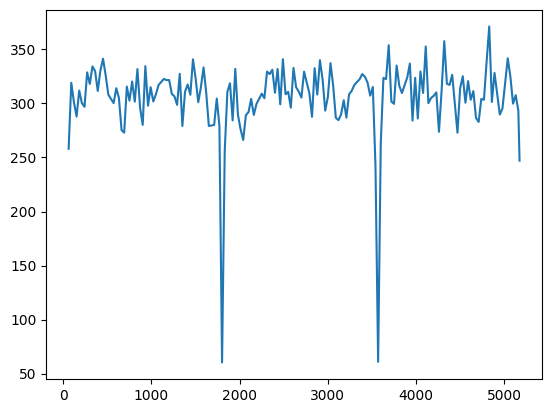

In [32]:
df_A100x2 = df_power[['Relative Time (Process)', 'Nvdia A100 x2 - system/gpu.process.0.powerWatts']].dropna()   
x = df_A100x2['Relative Time (Process)']
y = df_A100x2['Nvdia A100 x2 - system/gpu.process.0.powerWatts']

# df_A100x1 = df_power[['Relative Time (Process)', 'Nvdia A100x1 - system/gpu.process.0.powerWatts']].dropna()   
# x = df_A100x1['Relative Time (Process)'] 
# y = df_A100x1['Nvdia A100x1 - system/gpu.process.0.powerWatts']

# df_H100x1 = df_power[['Relative Time (Process)', 'Nvidia H100 x1 - system/gpu.process.0.powerWatts']].dropna()   
# x = df_H100x1['Relative Time (Process)'] 
# y = df_H100x1['Nvidia H100 x1 - system/gpu.process.0.powerWatts']

time_seconds = x
power_watts = y
total_energy = 0
for i in range(1, len(time_seconds)):
    dt = time_seconds.iloc[i] - time_seconds.iloc[i-1]
    avg_power = (power_watts.iloc[i] + power_watts.iloc[i-1]) / 2
    energy = avg_power * dt
    total_energy += energy
total_kwh = total_energy / (1000 * 3600)
cost = total_kwh * 4

print(f"Total Energy: {total_kwh:.4f} kWh")
print(f"Cost: {cost} USD")
plt.plot(x, y)
plt.show()